# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [2, 100, 400]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6353,8808,7684,2405,3516,7844
1,11594,7779,12144,3252,8035,3029
2,4446,906,1238,3576,153,1014


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Samples' cost by quartiles:

|  | Fresh | Milk | Grocery | Frozen | Detergents_Paper | Delicatessen |
|-----------------------------------------------------------------------
| Sample 0 | Q2    | Q4   | Q3      | Q3     |  Q3              | Q4           |
| Sample 1 | Q3    | Q4   | Q4      | Q3     |  Q4              | Q4           |
| Sample 2 | Q2    | Q1   | Q1      | Q4     |  Q1              | Q3           |

- Sample #0: this establishment might be a **food market** that specializes in the `Delicatessen` category: above average or average cost for all categories but `Delicatessen`. Cost of `Delicatessen` category is greater than `Q3 + 4*IQR`
- Sample #1: this establishment could be a **super market** because spending is high across all categories and spendings on `Detergents_Paper`, `Grocery` and `Milk` outweight spendings of sample #0 on similar categories. Large cost of `Fresh` and `Detergent_Paper`, compared to sample #0, may suggest that this establishment has larger customer base. Cost of `Delicatessen` category is in Q4, but IQR for this category is small compared to other categories and the cost is less than `Q3 + 1.5*IQR`, which may suggest that the establishment provides basic assortment of products in this category.
- Sample #2: this migh be a **cafe**, because purchase cost is low for Milk, Grocery and Detergent_Paper categories, while cost for `Fresh` and `Frozen` categories is in Q2 and Q4 quartiles. This may indicate that this customer derives most of its revenue from `Fresh` and `Frozen` categories. Products from these categories may serve as main ingridients of its cuisine.


   

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [47]:
from sklearn.cross_validation import train_test_split, ShuffleSplit
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, r2_score

feature = 'Detergents_Paper'
labels = data[feature]
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop([feature], axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, labels, test_size=0.25, random_state=112233)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=112233)
regressor.fit(X_train, y_train)
y = regressor.predict(X_test)
# TODO: Report the score of the prediction using the testing set
score = r2_score(y_test, y)
print "Score: {:,.2f}".format(score)




Score: 0.80


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

It would be wrong to say that I attempted to predict `Detergent_Paper` feature only. In fact I ran the regressor from the code cell above for number of features and high on the list of features were `Grocery`, `Detergent_Paper` and `Milk`. These features - `Grocery`, `Detergent_Paper` and `Milk` - were selected based on the value of Pearson's correlation coefficient between them. 
We compute Pearson's correlation for the features - see the code cell below - and get following measures of the linear relationships between two features ( 5 top values of the Pearson's coefficient listed here):
- +0.92 ... Grocery vs. Detergents_Paper
- +0.73 ... Grocery vs. Milk
- +0.66 ... Milk vs. Detergents_Paper
- +0.41 ... Milk vs. Delicatessen
- +0.39 ... Frozen vs. Delicatessen

Prediction score for the `Detergent_Paper` feature is highest among prediction scores for all other features.

- Feature:          Detergents_Paper
- Prediction score: 0.80

This feature is weakly relevant for identifying customer's spending habits. We may say this, because a regression model, trained on the data set with other five features, has high score predicting values of this feature. Values of the 'Detergent_Paper' feature correlate with values of `Grocery` and `Milk` features.

In [61]:
from scipy.stats import pearsonr
features = ['Fresh', 'Frozen', 'Grocery', 'Milk', 'Detergents_Paper', 'Delicatessen']
scores = []
for i, f1 in enumerate(features):
    for f2 in features[i+1:]:
        r, _ = pearsonr(data[f1], data[f2])
        scores.append((r, (f1, f2)))
scores = sorted(scores, key=lambda x: abs(x[0]), reverse=True)
print 'Pearson\'s correlation coefficients.'
for s in scores:
    print '{2:+.02f} ... {0} vs. {1}'.format(s[1][0], s[1][1], float(s[0]))

Pearson's correlation coefficients.
+0.92 ... Grocery vs. Detergents_Paper
+0.73 ... Grocery vs. Milk
+0.66 ... Milk vs. Detergents_Paper
+0.41 ... Milk vs. Delicatessen
+0.39 ... Frozen vs. Delicatessen
+0.35 ... Fresh vs. Frozen
+0.24 ... Fresh vs. Delicatessen
+0.21 ... Grocery vs. Delicatessen
-0.13 ... Frozen vs. Detergents_Paper
+0.12 ... Frozen vs. Milk
-0.10 ... Fresh vs. Detergents_Paper
+0.10 ... Fresh vs. Milk
+0.07 ... Detergents_Paper vs. Delicatessen
-0.04 ... Frozen vs. Grocery
-0.01 ... Fresh vs. Grocery


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

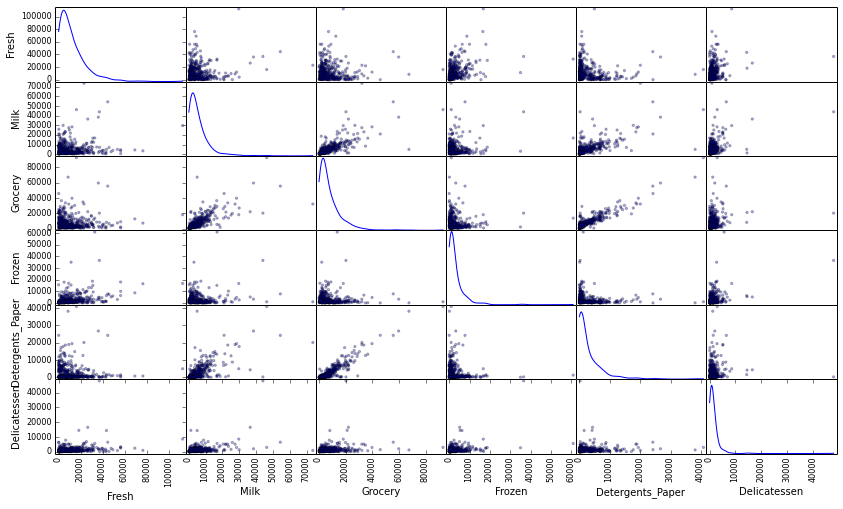

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

Following features exhibit a good degree of correlation:
- Detergent_Paper, Grocery
- Detergent_Paper, Milk
- Milk, Grocery

Most of the data points for these features are scattered along a regression line.
Only for these three features the coefficient of determination `R^2` is greater than 0. This - correlation of features - confirms that the `Detergent_Paper` feature is not relevant for predicting specific customer.

According to the scatter plots shown on the diagonal and data set stats, data is not distributed normally.The distribution could be log-normal. If a variable `X` has log-normal distribution, then vairable `Y = LN(X)` will exibit normal distribution.
To test a hypothesis that a feature's data has log-normal distribution we will apply `np.log` transform to the feature's data and will produce a Q-Q plot of transformed data against standard normal population. If points lie on a straight line - it suggests that data is normally distributed.

Based on the plots below, we see that plots for all of the features, but `Fresh` and `Delicatessen`, exhibit good linearity with `r^2 > 0.98`. For `Fresh`'s data, linear model explains 94% of variance, and for `Delicatessen` - 96% of variance.
We may suggest that the features' data exhibit log-normal distribution.

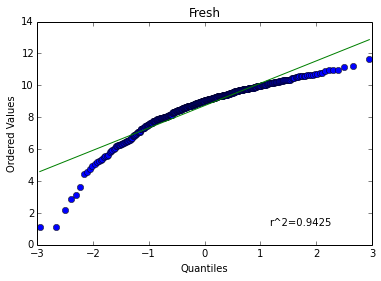

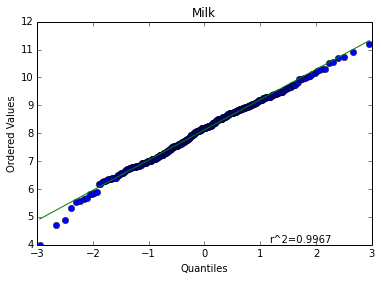

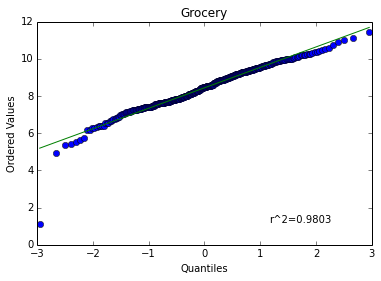

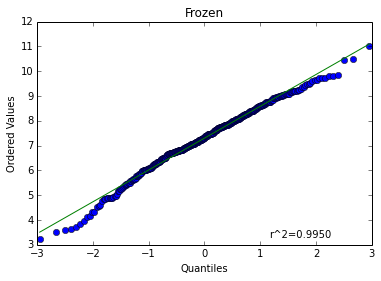

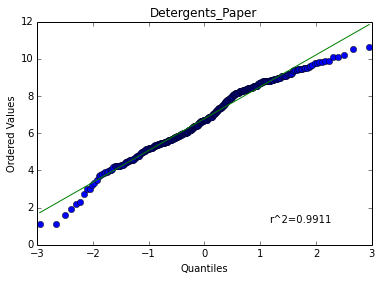

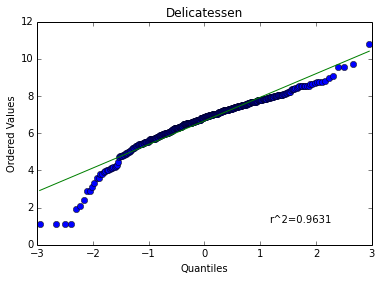

In [127]:
from scipy.stats import probplot
import matplotlib.pyplot as pyplot

# Q-Q plot of feature's original data.
plots = [('Fresh', 331),('Milk', 332), ('Grocery', 333), 
         ('Frozen', 334), ('Detergents_Paper', 335), ('Delicatessen', 336)]

for (feature, _) in plots:
    fig = pyplot.figure()
    probplot(np.log(data[feature]), plot=pyplot)
    pyplot.title('{0}'.format(feature))
pyplot.show()

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

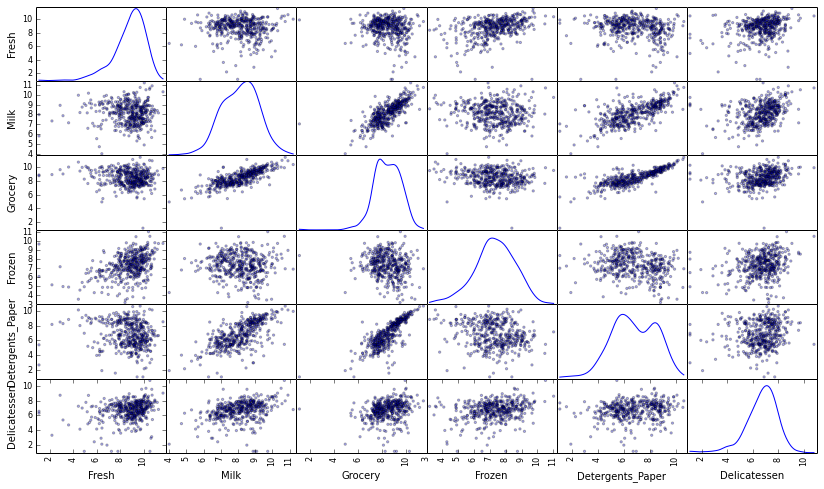

In [7]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
1,9.358243,8.959183,9.404590,8.087025,8.991562,8.015988
2,8.399760,6.809039,7.121252,8.182000,5.030438,6.921658


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [96]:
# For each feature find the data points with extreme high or low values
from collections import defaultdict

outliers = []
# capture client => feature+ for clients with costs considered outlier.
clients = defaultdict(list)

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 =np.percentile(log_data[feature], 25)

    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    indices = [i for i, v in enumerate(log_data[feature] < Q1 - step) if v]
    indices.extend([i for i, v in enumerate(log_data[feature] > Q3 + step) if v])
    outliers.extend(indices)
    for i in indices:
        clients[i].append(feature)

# Output clients ordered by number of categories where 
# client's spending is in outlier region.        
print "Number of clients with costs in outlier ranges: {0}".format(len(clients))
clients = sorted([(k, v) for k, v in clients.iteritems() if len(v) > 1], key=lambda x: len(x[1]), reverse=True)
print "Number of clients with costs in outlier ranges for more than one category: {0}".format(len(clients))
for k, v in clients:
    print "Client {0:.<6}outlier categories: {1}".format(k, ", ".join(v))
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Number of clients with costs in outlier ranges: 42
Number of clients with costs in outlier ranges for more than one category: 5
Client 154...outlier categories: Milk, Grocery, Delicatessen
Client 128...outlier categories: Fresh, Delicatessen
Client 65....outlier categories: Fresh, Frozen
Client 66....outlier categories: Fresh, Delicatessen
Client 75....outlier categories: Grocery, Detergents_Paper


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

- Client 154...outlier categories: Milk, Grocery, Delicatessen
- Client 128...outlier categories: Fresh, Delicatessen
- Client 65....outlier categories: Fresh, Frozen
- Client 66....outlier categories: Fresh, Delicatessen
- Client 75....outlier categories: Grocery, Detergents_Paper


- `Milk`, `Grocery` and `Detergent_Paper` features are positively correlated, which is supported both by scatterplot and values of Pearson's coefficients that are greater than 0.6. Thus it is expected that if value of the `Grocery` feature lies in 'outlier' region then value of `Detergent_Paper` and / or `Milk` features may lie in its outlier regions.
- We cannot use same argument for `Fresh`, `Frozen` and `Delicatessen` features, because the scatterplot does not indicate linear  relationship between these features.


I did not add data points to the `outliers` collection, because at this point we can't argue why these data points are invalid. In case of samples with outliers for more than one feature, it might be that these samples consitute establishments that are under represented in our sample data set. All the samples with outliers can be legitimate observations.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

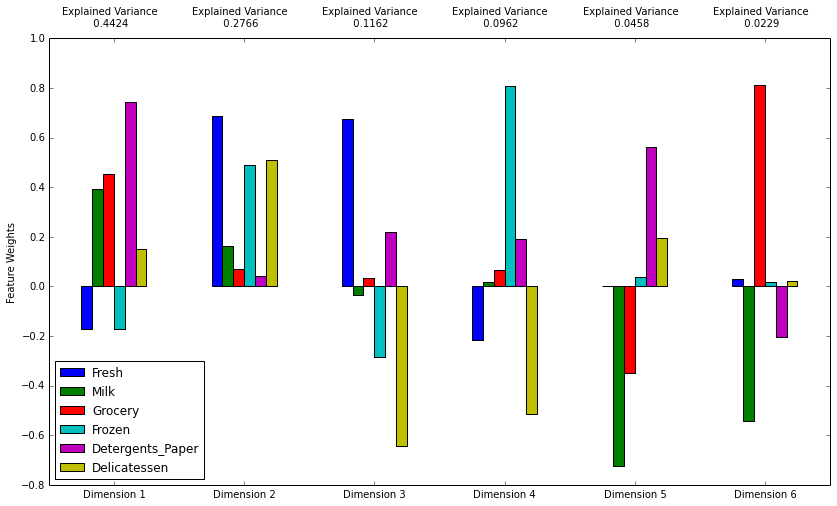

In [10]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(good_data)
# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

- First and second principal components explain *72%* variance in the data.
- First four principal components explain *93%* variance in the data.

Each principal component is defined by coefficients of linear combination. To find a projection of a sample's point to a principal component, we compute a dot product of the sample's features vector with the principal component's vector - linear combination of the sample's features.

- PC1: this dimension can be used to score customers by spending on (Milk, Groceries and Detergent) vs. (Fresh, Frozen).
- PC2: this dimension can be used to score customers by spending on (Fresh, Frozen, Delicatessen).
- PC3: this dimension can be used to score customers by spending on (Fresh, Detergent) vs. (Frozen, Delicatessen).
- PC4: this dimension can be used to score customers by spending on (Frozen, Detergent) vs. (Fresh, Delicatessen).


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [11]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.8937,1.6766,-1.3189,-0.4852,0.3736,-0.3284
1,2.3702,1.7971,-0.1871,0.3020,0.5955,-0.0546
2,-2.4819,-0.0446,-1.0212,0.2059,0.4992,0.0051


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [28]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [29]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.8937,1.6766
1,2.3702,1.7971
2,-2.4819,-0.0446


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

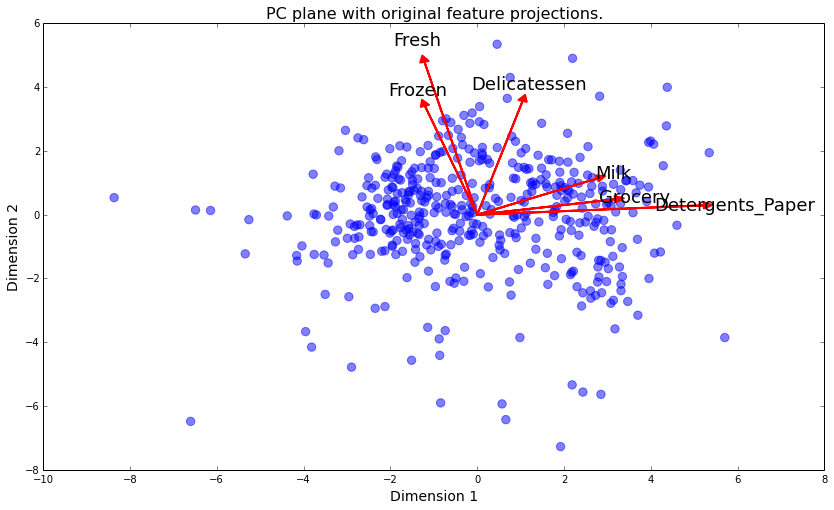

In [30]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

1. K-means clustering algorithm advantages.
  1. Simple to impelement algorithm.
  2. K-means converges to local minima of its cost function in polynomial runnning time.
  3. K-means can be used as a solution for pre-clustering data.

2. Gaussian Mixture Model clustering algorithm advantages.
  1. Usually we are uncertain to which cluster given data point belongs and GMM learns a model where each data point is assigned a vector of weights - responsibilities of each cluster for this data point.
  2. GMM algorithm models overlapping and / or non-spherical underlying distributions better than hard k-means clustering.
  3. GMM is a fast algorithm to learn mixture model.
  
3. Which of the two algorithms to use on the wholesale customer data and why?
  1. Looking at the *biplot* figure it is hard to estimate - visually - number of customer segments and what are the boundaries of the segments could be. 
  2. Clusters, hidden in the data, overlap and likely are of different size. 
  3. Correlation of predictors, captured in covariance matrix, likely differ between clusters. 
  4. It would make sense to use GMM clustering algorithm on these data, because 
    1. GMM can be viewed as a soft clustering method - it can assign a data point to more than one cluster.
    2. GMM can infer clusters that have different sizes and different correlation structures.   

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [31]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GMM
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_score = float('-inf')
for num_clusters in range(2, 6):
    clusterer = GMM(n_components=num_clusters)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the. mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    if score > best_score:
        best_k = num_clusters
        best_score = score
        best_centers = centers[:]
        best_preds = preds[:]
        best_sample_preds = sample_preds[:]
    print "Clusters: ", num_clusters, " Score: ", score
preds = best_preds
sample_preds = best_sample_preds
centers = best_centers

Clusters:  2  Score:  0.316017379116
Clusters:  3  Score:  0.375222595239
Clusters:  4  Score:  0.356401755466
Clusters:  5  Score:  0.256747217763


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

- Clusters:  2  Score:  0.316017379116
- Clusters:  3  Score:  0.375222595239
- Clusters:  4  Score:  0.356401755466
- Clusters:  5  Score:  0.258424135423
- Clusters:  6  Score:  0.272766697728

Best silhouette score is 0.375 for 3 clusters.

This paragraph I am writing after my first submission attempt. 

Outliers removal experiments: apply different outlier criterias to observe effect of removal of exterme outliers on clustering.

|Experiment | Samples removed | Outlier Criteria | Clusters (GMM)  | Silhuette score |
|-----------|-----------------|------------------|-----------------|-----------------|
|1| 42 |`value <= Q1 - 1.5*IQR OR value >= Q3 + 1.5*IQR`| 2 | 0.44        |
|2| 20 |`value <= Q1 - 2.0*IQR OR value >= Q3 + 2.0*IQR`| 2 | 0.44        |
|3| 13 |`value <= Q1 - 2.5*IQR OR value >= Q3 + 2.5*IQR`| 2 | 0.42        |
|4| 9  |`value <= Q1 - 3.0*IQR OR value >= Q3 + 3.0*IQR`| 2 | 0.41        |
|5| 5 | samples `154, 128, 75, 66, 65`: 2 and more outlier features| 2| 0.41|
|6| 0  |` `                                              | 3 | 0.38       |

Removal of outliers produces different cluster structure - 2 clusters - with higher silhuette score - cohesion / separation measure.

We perform clustering in transformed feature space defined by principal components. PCA is sensitive to extreme outliers and `scikit` implementation of PCA does not provide `Robust PCA`. Thus when using PCA to transform original features before clustering, we shall identify and remove extreme outliers from the data set.

In experiment #5 we removed observations that have outliers for 2 and more features and removal of only 5 samples changes structure of clusters. These observations may represent type(s) of businesses that is/are misrepresented in our sample. In our data set these five observations are extreme outliers, please see a plot in the cell below, where these five samples are represented by `x` marks.

- Observations with "outlier" features values as a result of data collection / data entry errors should be dropped
- Observations with "outlier" features values as a result of mis-represented group(s) shall be retained.
- It may make sense to run clustering with and without observations marked as outlier and record change in results.

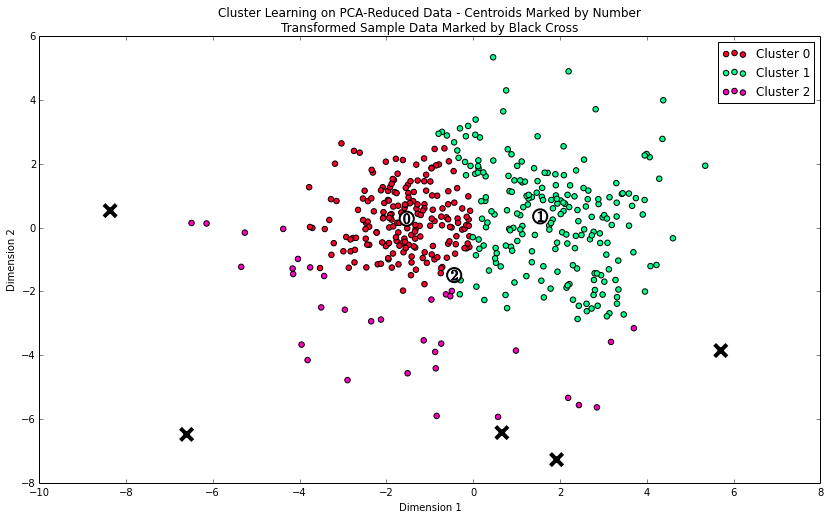

In [130]:
# Plot five outliers - samples with outliers in 2 or more features.
ix = [154, 128, 75, 66, 65]
five_outliers = pca.transform(np.log(pd.DataFrame(data.loc[ix], columns = data.keys()).reset_index(drop = True)))
vs.cluster_results(reduced_data, preds, centers, five_outliers)

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

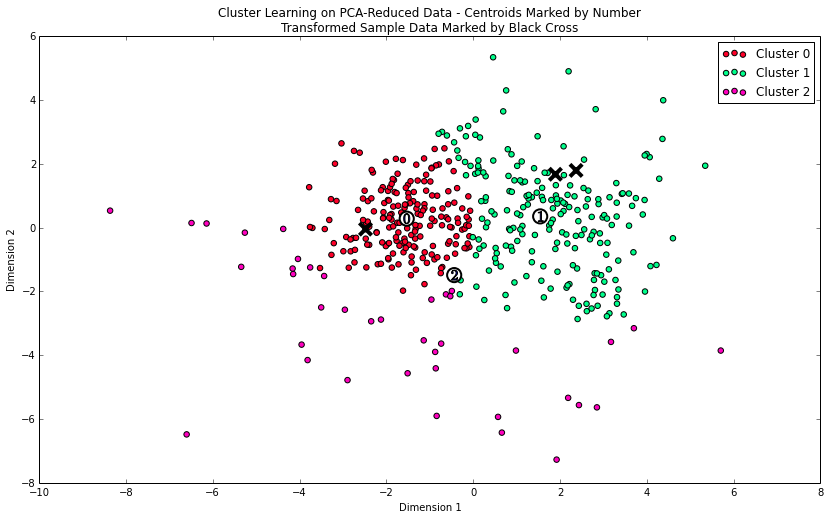

In [32]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [33]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9810.0,1925.0,2356.0,2216.0,286.0,721.0
Segment 1,6038.0,6551.0,9575.0,1351.0,2839.0,1184.0
Segment 2,2413.0,2223.0,3425.0,775.0,600.0,345.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**


Cost of segments by quartiles:

|  | Fresh | Milk | Grocery | Frozen | Detergents_Paper | Delicatessen |
|-----------------------------------------------------------------------
|Segment 0 | Q3    | Q2   | Q2      | Q3     |  Q2              | Q2           |
|Segment 1 | Q2    | Q3   | Q3      | Q2     |  Q3              | Q3           |
|Segment 2 | Q1    | Q2   | Q2      | Q2     |  Q2              | Q1           |

- Segment 0: represents restaurant / cafe segment. Spendings for Fresh and Frozen categories are in Q3 and for the rest categories - in Q2. Most revenue is generated from dishes made from `Fresh` and `Frozen` products and spendings should be higher for these categories.
- Segment 1: represents retail segment. For this segment average spending for Milk,Grocery, Detergent_Paper and Delicatessen is in Q3 quartile, which is consistent with retail business - these are categories that generate most revenue.
- Segment 2: may represent hospitality services that do not generate revenue by reselling or adding value to the products. Low cost for `Fresh`, `Delicatessen` and `Frozen` (Frozen cost is in Q2 but close to Q1) categories sets this segment apart from other two segments. A hotel that serves only breakfast with limited variety of food items may fit this cost model.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [34]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

- Samples 0 and 1 (data points 2 and 100) belong to the cluster #1.
- Sample 2 (data point index 400) belongs to the cluster #0.

The result is somewhat consistent with prediction, where sample #2 was assigned to `cafe`, and samples 0 and 1 were assigned to a `food market` and `super market` categories. 

Per clustering results, we may say that `food market` and `super market` are represented by `retailer` cluster.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

Our wholesale distributor may as well run A/B test to compare two versions of a variable - 5 days a week delivery service vs. 3 days a week delivery service.

- From each customer segment - cluster - pick a representative sample of customers.
- Inform selected customers of a beginning of the trial period - change in delivery service.
- Run delivery service 3 days a week for selected customers during the trial period.
- Process customers' feedback: for each customer segment compute ratio of negative responses to number of selected customers per customer segment. Ratio of positive responses would be `1 - ratio-of-negative-responses`.
- Convert a segment to the 3 days delivery service if ratio of positive responses is greater than a threshold for the segment.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

- Original customers data can be used as a training data set for a supervised learning algorithm.
- By clustering the original customer data we will produce a label - cluster name - for each data sample in the training set. Thus we will have data vectors - **X** -  and labels vector - **Y** - that we will use to train a classifier.
- We will apply the classifier to the new customers' data to assign labels - cluster membership - to the new customers.



### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

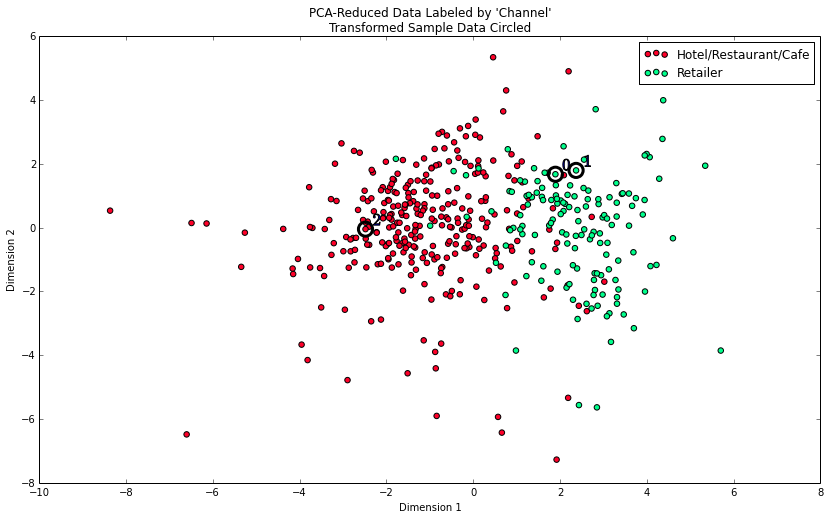

In [36]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

Clustering algorithm - GMM, each component has its own covariance matrix - produces optimal number of clusters - 3 - on this particular data set.

Clusters 0 and 2 match most of the underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers.

Cluster 1 captures most of the Retail customers and small fraction of the Hotels/Restaurants/Cafes customers.

Customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution are those points that were marked as outliers.

I consider these classifications being consistent with my previous definition of the customers segments.

Clustering algorithm would have produced **two** clusters with silhouette score **0.44** had I decided to remove points identified as outliers. But in my opinion these points do represent valid types of businesses and classification / labelling of data such as "Hotel/Restaurant/Cafe" is too broad and does not capture business size and/or business speciality such as Italian or Moroccan cuisine.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.